#  machine learning example 복습

1. Business Understanding
Business Objectives - develope new PEP(Personal Equity Plan) for non PEP users
Analytics Goal
PEP joiner prediction
Users database

2. Data Understanding
Obtain data
Analyse Obtained data

3. Data Preparation
Organize the data so it is functionable


4. Modeling
Train and Test

5. Evaluation
Get results - by using Algorithms 

6. Deployment
Use the data in the field.


In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# collected data
df = pd.read_csv("data_pepTestCustomers.csv")
df

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,ID12101,48.0,0,0,17546.00,0,1,0,0,0,0,1
1,ID12102,40.0,1,3,30085.10,1,3,1,0,1,1,0
2,ID12103,NaN,0,0,16575.40,1,0,1,1,1,0,0
3,ID12104,23.0,0,3,20375.40,1,3,0,0,1,0,0
4,ID12105,57.0,0,1,50576.30,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
595,ID12696,61.0,0,0,47025.00,0,2,1,1,1,1,0
596,ID12697,30.0,0,0,9672.25,1,0,1,1,1,0,0
597,ID12698,31.0,0,3,15976.30,1,0,1,1,0,0,1
598,ID12699,29.0,1,0,14711.80,1,0,0,1,0,1,0


In [3]:
# For deployment
new = pd.read_csv("data_pepNewCustomers.csv")
new.head()

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage
0,ID12701,23,1,0,18766.90,1,0,1,1,0,1
1,ID12702,30,1,1,9915.67,0,1,0,1,0,1
2,ID12703,45,0,1,21881.60,0,0,1,1,1,0
3,ID12704,50,1,3,46794.40,1,2,0,1,0,1
4,ID12705,41,0,0,20721.10,1,0,1,1,1,0


In [4]:
df.info()
# age 60개 비여있다

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           600 non-null    object 
 1   age          540 non-null    float64
 2   sex          600 non-null    int64  
 3   region       600 non-null    int64  
 4   income       600 non-null    float64
 5   married      600 non-null    int64  
 6   children     600 non-null    int64  
 7   car          600 non-null    int64  
 8   save_act     600 non-null    int64  
 9   current_act  600 non-null    int64  
 10  mortgage     600 non-null    int64  
 11  pep          600 non-null    int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 56.4+ KB


In [5]:
# 수치형 속성의 요약통계 보기
df.describe()

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
count,540.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,42.662963,0.500000,1.231667,27619.973883,0.660000,1.011667,0.493333,0.690000,0.758333,0.348333,0.456667
std,14.299387,0.500417,1.286113,13187.408966,0.474104,1.056752,0.500373,0.462879,0.428451,0.476840,0.498534
min,18.000000,0.000000,0.000000,5014.210000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.000000,0.000000,17264.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,42.500000,0.500000,1.000000,24925.300000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,56.000000,1.000000,3.000000,36172.675000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,67.000000,1.000000,3.000000,95435.200000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000200278317C8>,
      dtype=object)

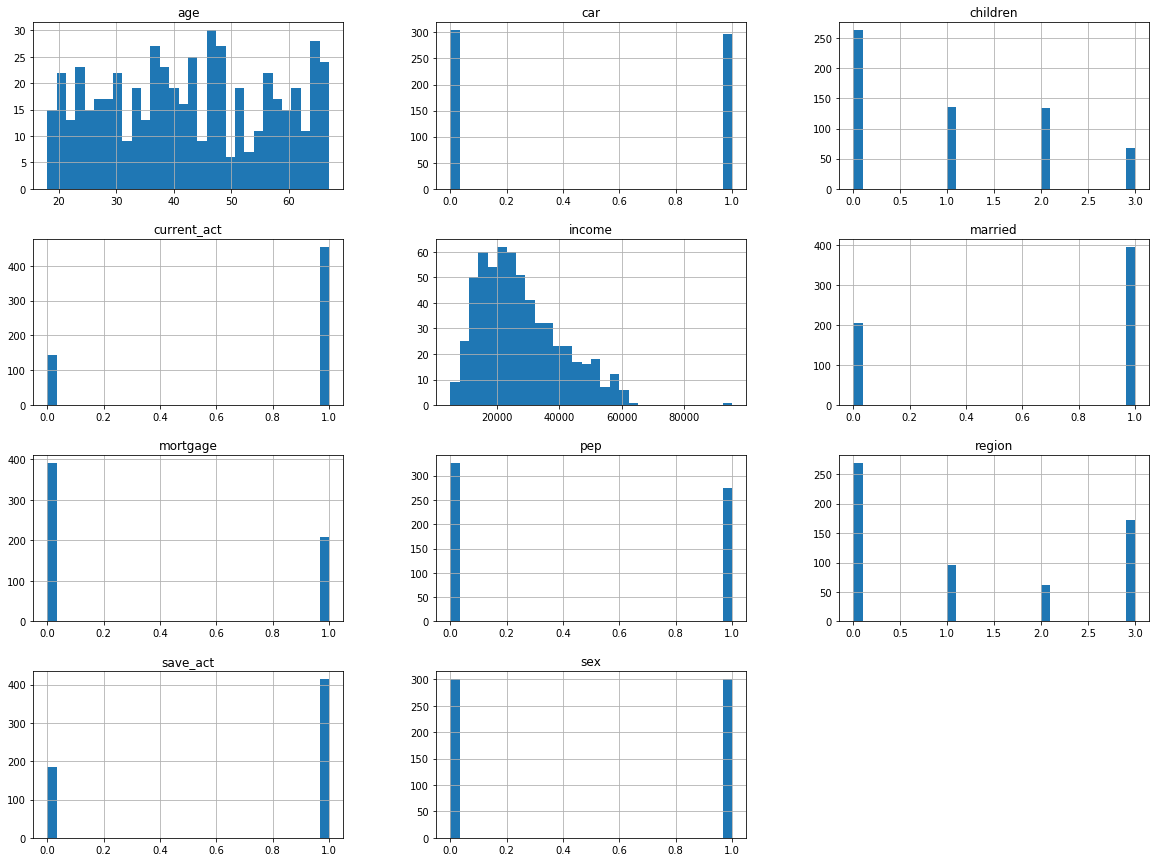

In [6]:
# 모든 수치형 속성에 대한 히스토그램 한꺼번에 그리기
# 숫치형은 age와 income 나머지는 범주형이라 볼 수 있다
# bins = 30 은 x축을 30개로 쪼개라
df.hist(bins=30, figsize=(20,15))

In [7]:
# 모형을 적용할 new 데이터에는 class 필드(즉, pep)가 없다.
display(df.shape) 
display(new.shape)

(600, 12)

(200, 11)

In [8]:
df.shape
new.shape

(200, 11)

In [9]:
# 속성 간 피어슨 상관계수 출력하기
# 전체 수치형 데이터를 콜러에이션으로 보여 줌
# 상관관계 예측변수를 줄여줌

corr = df.corr() #어떤게 관게가 좋은지 보여줌
corr # 1.000 은 재외, 왜냐면 나와 나 를 비교기때문. 의미 없다.

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
age,1.000000,-0.127984,0.025891,0.743619,0.017157,0.023944,0.068454,0.171417,-0.035449,-0.030696,0.193604
sex,-0.127984,1.000000,-0.035018,-0.030606,0.021110,-0.014206,0.006667,0.007207,-0.019466,0.066465,0.046843
region,0.025891,-0.035018,1.000000,0.009813,0.006188,0.011520,0.021860,0.084382,-0.013356,0.026083,-0.027279
income,0.743619,-0.030606,0.009813,1.000000,-0.002977,0.042774,0.072590,0.265233,0.035036,-0.019666,0.225086
married,0.017157,0.021110,0.006188,-0.002977,1.000000,-0.048716,-0.009571,0.028604,-0.059996,-0.021711,-0.189578
children,0.023944,-0.014206,0.011520,0.042774,-0.048716,1.000000,0.036455,0.041536,0.006238,-0.074339,-0.057663
car,0.068454,0.006667,0.021860,0.072590,-0.009571,0.036455,1.000000,0.034310,-0.034783,-0.007743,0.018917
save_act,0.171417,0.007207,0.084382,0.265233,0.028604,0.041536,0.034310,1.000000,0.042511,-0.001588,-0.072779
current_act,-0.035449,-0.019466,-0.013356,0.035036,-0.059996,0.006238,-0.034783,0.042511,1.000000,-0.036704,0.025141
mortgage,-0.030696,0.066465,0.026083,-0.019666,-0.021711,-0.074339,-0.007743,-0.001588,-0.036704,1.000000,-0.024182


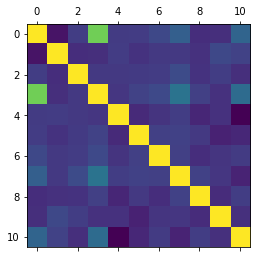

In [10]:
# 속성간 상관계수를 한눈에 파악하기 위해 그림으로 도식하기

plt.matshow(corr)

In [11]:
##상관계수 파이썬 시각화
import seaborn as sns

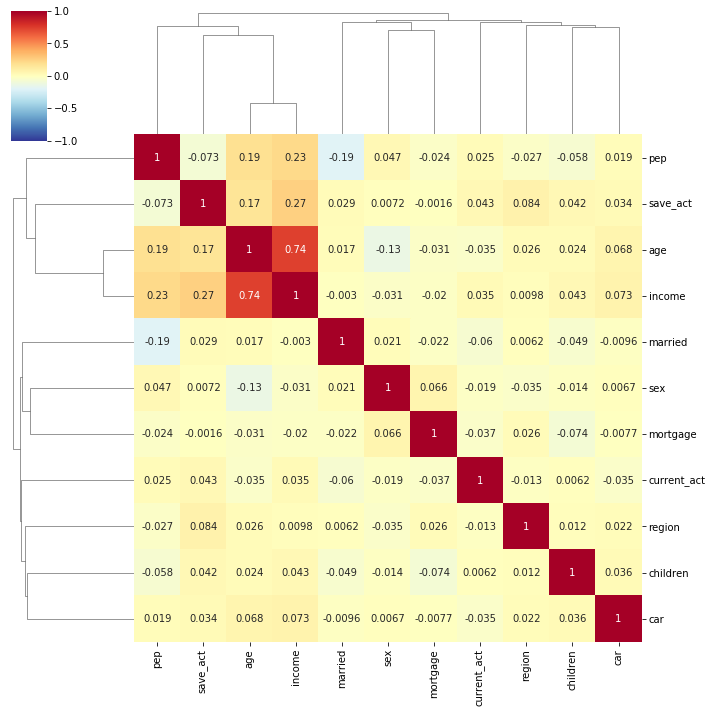

In [12]:
sns.clustermap(corr, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )

In [13]:
# 클래스 변수인 pep와 각 속성간의 피어슨 상관계수를 내림차순으로 출력하기
# pep 데이터 sorting

corr.pep.sort_values(ascending=False)

pep            1.000000
income         0.225086
age            0.193604
sex            0.046843
current_act    0.025141
car            0.018917
mortgage      -0.024182
region        -0.027279
children      -0.057663
save_act      -0.072779
married       -0.189578
Name: pep, dtype: float64

##### Detect Outliers #####
<img align="left" src="http://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png" alt="Boxplot Outlier">

age       AxesSubplot(0.125,0.536818;0.775x0.343182)
income       AxesSubplot(0.125,0.125;0.775x0.343182)
dtype: object

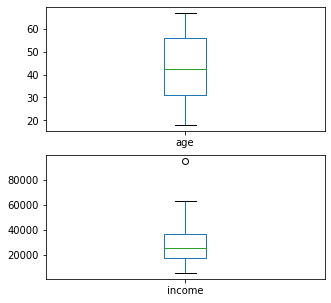

In [14]:
# age와 income에 이상치가 있는지 Boxplot을 그려서 알아본다.
# 이상치 발굴은 boxplot에서 박스 밖에 있는 점을 이상치(Outlier)로 본다.

df.loc[:,['age','income']].plot.box(subplots=True, layout=(2,1), figsize=(5,5))

In [15]:
# Data Preparation
# Save original data 
# => 학습 데이터를 조작하다가 문제가 생겨 처음으로 되돌아 가려면 이 셀부터 다시 시작하세요 !!!
# 데이터 원본 유지를 이해 copy를 사용

mdf = df.copy()

In [16]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           600 non-null    object 
 1   age          540 non-null    float64
 2   sex          600 non-null    int64  
 3   region       600 non-null    int64  
 4   income       600 non-null    float64
 5   married      600 non-null    int64  
 6   children     600 non-null    int64  
 7   car          600 non-null    int64  
 8   save_act     600 non-null    int64  
 9   current_act  600 non-null    int64  
 10  mortgage     600 non-null    int64  
 11  pep          600 non-null    int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 56.4+ KB


In [17]:
# 나이의 평균값과 나이별 발생빈도 계산하기
# 채워넣을 땐 평균 또는 최빈값(가장 많이 나오는 값)을 쓴다

display(mdf.age.mean())
display(mdf.age.value_counts().head())
# 평균나이 42.6
#40살이 19명
#64살이 18명
# 등등

42.662962962962965

40.0    19
64.0    18
58.0    17
27.0    17
43.0    17
Name: age, dtype: int64

In [18]:
# 평균값으로 결측값 대체하기
# fillna 는 널값을 채우라. 여기서는 평균으로 채우고 있음.
# 분석의 상황에 따라 null 값을 그대로 사용함.
 
mdf.age.fillna(round(mdf.age.mean(),0), inplace=True)
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           600 non-null    object 
 1   age          600 non-null    float64
 2   sex          600 non-null    int64  
 3   region       600 non-null    int64  
 4   income       600 non-null    float64
 5   married      600 non-null    int64  
 6   children     600 non-null    int64  
 7   car          600 non-null    int64  
 8   save_act     600 non-null    int64  
 9   current_act  600 non-null    int64  
 10  mortgage     600 non-null    int64  
 11  pep          600 non-null    int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 56.4+ KB


In [19]:
display(mdf.age.mean())
display(mdf.age.value_counts().head())

42.696666666666665

43.0    77
40.0    19
64.0    18
58.0    17
27.0    17
Name: age, dtype: int64

In [20]:
# Construct Data
# 명목소득 보다 명목소득을 자녀수로 나눈 실질소득이 개인연금 가입에 더 유효한 속성이라고 가정하고 이를 구현
# 자식에 따라 realincome 변수를 추가
# 중요한 부분****** column 추가*** 예측하기 더 좋다**
mdf['realincome'] = np.where(mdf['children']==0, mdf['income'], mdf['income']/mdf['children'])
mdf.head()
#np.where(mdf['children']==0 # 자녀가 없는건 따로 빼논다.
#이런 파생변수를 잘 만들어야 됀다****

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep,realincome
0,ID12101,48.0,0,0,17546.0,0,1,0,0,0,0,1,17546.000000
1,ID12102,40.0,1,3,30085.1,1,3,1,0,1,1,0,10028.366667
2,ID12103,43.0,0,0,16575.4,1,0,1,1,1,0,0,16575.400000
3,ID12104,23.0,0,3,20375.4,1,3,0,0,1,0,0,6791.800000
4,ID12105,57.0,0,1,50576.3,1,0,0,1,0,0,0,50576.300000


In [21]:
# Select - Constructed DATA!*

### Split Data ###
<img align="left" src="https://www.developer.com/imagesvr_ce/6793/ML4.png" width=500 height=500 alt="Boxplot Outlier">

In [22]:
# for Hold-out validation

from sklearn.model_selection import train_test_split

In [23]:
# scikit-learn에서는 속성과 클래스를 분리하여야 한다.
#X 값 - id 는 object 그리고 pep. 의미 없다 해서 뺌

dfX = mdf.drop(['id','pep'], axis=1)  # exclude 'id' attribute & class variable
dfy = mdf['pep']                    # class variable
X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size=0.25, random_state=0)

In [24]:
# 지정한 비율(75:25)로 데이터가 잘 나누어졌는지 확인

display(X_train.shape, X_test.shape)
X_train.head()

(450, 11)

(150, 11)

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,realincome
46,50.0,0,0,13283.9,0,1,1,1,1,0,13283.9
263,60.0,0,0,46358.4,1,0,1,1,1,1,46358.4
458,18.0,1,2,13700.2,0,1,0,1,1,0,13700.2
230,59.0,0,0,30189.4,1,0,1,0,1,1,30189.4
107,23.0,1,0,13039.9,1,0,0,0,1,0,13039.9


In [25]:
#인재 이걸가지고 modeling을 해보자

<font color = "darkgreen">
##### 1. Decision Trees #####
</font>
<img align="left" src="https://cdn-images-1.medium.com/max/870/1*xzF10JmR3K0rnZ8jtIHI_g.png" width=700 height=500 alt="Decision Tree">

In [26]:
# 1. Import the estimator

from sklearn.tree import DecisionTreeClassifier

In [27]:
# 2. Instantiate the estimator

tree = DecisionTreeClassifier(max_depth=6, random_state=0)

In [28]:
# 3. Fit the data to the estimator

tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [29]:
# 4. Generate a prediction

pred_tree = tree.predict(X_test); pred_tree

array([0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [30]:
#Assess Model
# 5. Evaluate the estimator
# 

display(tree.score(X_train, y_train))
display(tree.score(X_test, y_test))

0.94

0.8666666666666667

<font color = "darkgreen">
##### 2. SVM (Support Vector Machine) #####
<img align="left" src="https://78.media.tumblr.com/0e459c9df3dc85c301ae41db5e058cb8/tumblr_inline_n9xq5hiRsC1rmpjcz.jpg"
width=500 height=500 alt="SVM">

In [31]:
from sklearn.svm import SVC 
svm = SVC(random_state=0) #svc 형으로 학습을 시켰다
svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [32]:
#Assess Model
# 5. Evaluate the estimator
# 
display(svm.score(X_train, y_train))
display(svm.score(X_test, y_test))

0.66

0.6333333333333333

<font color = "darkgreen">
##### 3. Neural Networks (Multi-layer Perceptron) #####
</font>  
<img align="left" src="https://3.bp.blogspot.com/-vYvrkXroyDY/WdObH7y6rBI/AAAAAAAAAZ0/nqYZCwLD2doT354ZJLI0HBkcY-Pjc8LqACLcBGAs/s1600/neural_nets_thumbnail.png" width=400 height=300 alt="NN">
<img align="left" src="https://cdn-images-1.medium.com/max/479/1*QVIyc5HnGDWTNX3m-nIm9w.png" width=600 height=400 alt="NN">

In [33]:
# 아래에 Neural Network 모형을 생성하는 코드를 작성하시오.
# 단, 모형을 저장하는 변수명을 mlp로 할 것!

from sklearn.neural_network import MLPClassifier 
mlp = MLPClassifier()
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [34]:
# 아래에 Neural Network 모형의 성능을 평가하는 코드를 작성하시오.

display(mlp.score(X_train, y_train))
display(mlp.score(X_test, y_test))

0.5333333333333333

0.5733333333333334

In [35]:
# Evaluation

In [36]:
best_model = tree   # Change this code if the best model is not decision tree.
best_model.score(X_test, y_test)

0.8666666666666667

In [37]:
# 랜덤 모형의 성능과 개발 모형의 성능을 비교한다.

from sklearn.dummy import DummyClassifier
print(y_test.value_counts())
DummyClassifier(strategy='most_frequent').fit(X_train, y_train).score(X_test, y_test)
# 0 이 78게
#1 이 72게

0    78
1    72
Name: pep, dtype: int64


0.52

In [38]:
# Deployment

In [39]:
# You must do the same preprocessing as the modeling data.
columns = ['income', 'children', 'current_act', 'car', 'mortgage', 'region']
ndf = new.copy()
ndf['realincome'] = np.where(ndf['children']==0, ndf['income'], ndf['income']/ndf['children'])
ndf.head()

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,realincome
0,ID12701,23,1,0,18766.90,1,0,1,1,0,1,18766.90
1,ID12702,30,1,1,9915.67,0,1,0,1,0,1,9915.67
2,ID12703,45,0,1,21881.60,0,0,1,1,1,0,21881.60
3,ID12704,50,1,3,46794.40,1,2,0,1,0,1,23397.20
4,ID12705,41,0,0,20721.10,1,0,1,1,1,0,20721.10


In [40]:
# A Case: Apply the best model to select target customers

In [41]:
# 개발 모형에 고객 데이터를 적용하여 개인연금 구매여부를 예측: id 제외

ndf['pred'] = best_model.predict(ndf.loc[:,'age':'realincome'])

In [42]:
# 개인연금 구매확률을 예측: predict_proba() 사용
print(best_model.predict_proba(ndf.loc[:,'age':'realincome']))
ndf['pred_prob'] = best_model.predict_proba(ndf.loc[:,'age':'realincome'])[:,1]
ndf.head()

[[0.9047619  0.0952381 ]
 [1.         0.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.91025641 0.08974359]
 [0.         1.        ]
 [0.9047619  0.0952381 ]
 [0.         1.        ]
 [0.66666667 0.33333333]
 [0.         1.        ]
 [0.9047619  0.0952381 ]
 [0.         1.        ]
 [0.91025641 0.08974359]
 [0.91025641 0.08974359]
 [1.         0.        ]
 [0.         1.        ]
 [0.9047619  0.0952381 ]
 [0.         1.        ]
 [0.         1.        ]
 [1.         0.        ]
 [0.         1.        ]
 [0.86956522 0.13043478]
 [0.25       0.75      ]
 [0.9047619  0.0952381 ]
 [1.         0.        ]
 [0.         1.        ]
 [0.91025641 0.08974359]
 [0.9047619  0.0952381 ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.86956522 0.13043478]
 [0.         1.        ]
 [1.         0.        ]
 [0.91025641 0.08974359]
 [0.91025641 0.08974359]
 [0.91025641 0.08974359]
 [0.9047619  0.0952381 ]
 [1.         0.        ]
 [1.         0.        ]


,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,realincome,pred,pred_prob
0,ID12701,23,1,0,18766.90,1,0,1,1,0,1,18766.90,0,0.095238
1,ID12702,30,1,1,9915.67,0,1,0,1,0,1,9915.67,0,0.000000
2,ID12703,45,0,1,21881.60,0,0,1,1,1,0,21881.60,1,1.000000
3,ID12704,50,1,3,46794.40,1,2,0,1,0,1,23397.20,1,1.000000
4,ID12705,41,0,0,20721.10,1,0,1,1,1,0,20721.10,0,0.089744


In [43]:
# 특정 조건을 만족하는 고객 리스트를 추출하고 저장
# query 조건 만족 행을 뽑을 때 사용

target = ndf.query('pred == 1 & pred_prob > 0.7')  # PEP에 가입할 확율이 70%가 넘는 고객만 추출
target.sort_values(by="pred_prob", ascending=False).to_csv("pep_target.csv", index=False)
pd.read_csv("pep_target.csv").tail()

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,realincome,pred,pred_prob
75,ID12752,61,1,1,40315.6,1,2,1,1,1,0,20157.8,1,1.00
76,ID12723,54,1,1,49986.7,1,1,1,1,1,0,49986.7,1,0.75
77,ID12884,66,0,0,60635.6,1,1,1,1,1,1,60635.6,1,0.75
78,ID12896,66,1,0,58792.6,0,1,1,1,1,1,58792.6,1,0.75
79,ID12782,44,1,1,39202.2,0,1,1,1,1,1,39202.2,1,0.75


In [44]:
# Gradient Boosting 알고리즘해서 확율을 더 올려보자
# 이 알고리즘은, 한 큰나무안에 여러 나무를 너어 한나무 그다음나무 오류를 수정해
# 나가는 방식

# Random Forest 는 여러 나무를 돌려보는것.


In [45]:
from sklearn.ensemble import GradientBoostingClassifier

In [46]:
grad_model = GradientBoostingClassifier()

grad_model.fit(X_train,y_train)
train_score = grad_model.score(X_train, y_train)
test_score = grad_model.score(X_test, y_test)
display(train_score, test_score)

0.9511111111111111

0.9066666666666666

In [47]:
grad_model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

- 주목해야 할 인자는 n_estimators 와 max_depth, learning_rate 이다.
- n_estimators 는 나무의 갯수이다.
- 그래디언트 부스팅은 깊이를 작게하고 나무의 갯수를 늘리는 전략을 많이 취한다.
- learning_rate는 학습률로서, 이전에 만든 나무의 오류에 기반하여 얼마나 많이 수정해 나갈지의 비율을 의미한다. 값이 클수록 복잡한 모델을 만들게 된다.

In [48]:
grad_model =GradientBoostingClassifier(n_estimators=100000, max_depth=1000)
grad_model.fit(X_train, y_train)

train_score = grad_model.score(X_train, y_train)
test_score = grad_model.score(X_test, y_test)
display(train_score, test_score)

1.0

0.8333333333333334

In [81]:
conda install -c conda-forge scikit-plot

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\TJ\anaconda3

  added / updated specs:
    - scikit-plot


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.3                |   py37hc8dfbb8_1         3.1 MB  conda-forge
    python_abi-3.7             |          1_cp37m           4 KB  conda-forge
    scikit-plot-0.3.7          |             py_1          25 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.1 MB

The following NEW packages will be INSTALLED:

  python_abi         conda-forge/win-64::python_abi-3.7-1_cp37m
  scikit-plot        conda-forge/noarch::scikit-plot-0.3.7-py_1

The following packages will be UPDATED:

  conda                       pkgs/main::conda-4.8.2-py37_0 --> conda-forge::conda-4.8.3-py37hc8dfbb8_1




conda-4.8.3  



==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base -c defaults conda




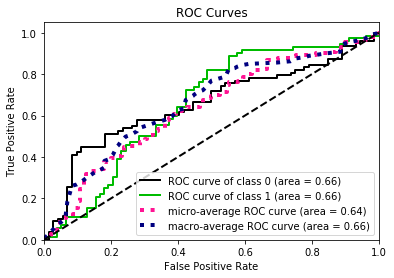

In [50]:
import scikitplot as skplt
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb = nb.fit(X_train, y_train)
y_probas = nb.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)
plt.show()

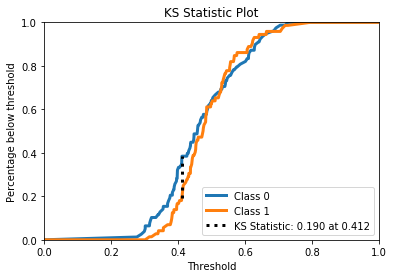

In [52]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr = lr.fit(X_train, y_train)
y_probas = lr.predict_proba(X_test)
skplt.metrics.plot_ks_statistic(y_test, y_probas)
plt.show()

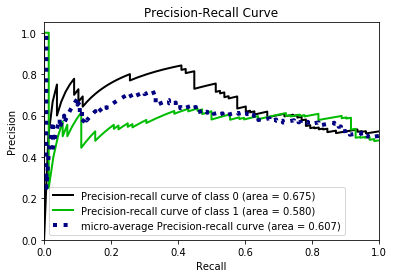

In [53]:
import scikitplot as skplt
nb = GaussianNB()
nb.fit(X_train, y_train)
y_probas = nb.predict_proba(X_test)
skplt.metrics.plot_precision_recall(y_test, y_probas)
plt.show()

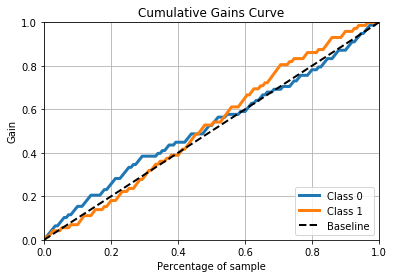

In [54]:

lr = LogisticRegression()
lr = lr.fit(X_train, y_train)
y_probas = lr.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(y_test, y_probas)
plt.show()

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

model = KNeighborsClassifier()

In [55]:
# 크로스 밸리데이션
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train); scores
# 예제 데이터가 심플하여 일반적인 예측 알고리즘에서도 결과가 좋다

array([0.63333333, 0.62222222, 0.7       , 0.66666667, 0.68888889])

In [56]:
# k를 조정하여 다섯번(cv=5) 돌려본다.
scores = cross_val_score(model, X_train, y_train, cv=50); scores

array([0.77777778, 0.44444444, 0.77777778, 0.55555556, 0.44444444,
       0.88888889, 0.44444444, 0.77777778, 0.44444444, 0.55555556,
       0.55555556, 0.55555556, 0.88888889, 0.66666667, 0.55555556,
       0.77777778, 1.        , 0.66666667, 0.66666667, 0.33333333,
       0.77777778, 0.66666667, 0.55555556, 0.66666667, 0.55555556,
       0.44444444, 0.55555556, 0.66666667, 0.44444444, 0.66666667,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 0.77777778,
       0.77777778, 0.66666667, 0.77777778, 0.55555556, 0.66666667,
       0.44444444, 0.88888889, 0.88888889, 0.66666667, 0.88888889,
       0.66666667, 0.66666667, 0.77777778, 0.44444444, 0.66666667])

In [57]:
print("Mean: {:.3f}\nStd: {:.3f}\nMin: {:.3f}\nMax: {:.3f}".format(
    scores.mean(), scores.std(), scores.min(), scores.max()))
# 분산이 작으면 Overfitting 이 적다

Mean: 0.658
Std: 0.152
Min: 0.333
Max: 1.000


In [58]:
# 하나씩 빼면서 돌린다. 테이터 데이터를 하나로 두는 것. 데이터 수많큼 크로스 벨리데이션 한다.
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, X_train, y_train, cv=LeaveOneOut())
scores.mean()

0.6444444444444445

In [59]:
from sklearn.model_selection import ShuffleSplit

sscv = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(model, X_train, y_train, cv=sscv)
scores.mean()

0.6493333333333334

In [60]:
# 파라미터는 dict 타입으로 지정됨.
param_grid = {'n_neighbors': range(1,5),
              'weights': ['uniform','distance']}
param_grid

{'n_neighbors': range(1, 5), 'weights': ['uniform', 'distance']}

In [61]:
#  자동으로 복수개의 내부 모형을 생성하고 이를 모두 실행시켜서 
#  최적 파라미터를 찾아준다
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs=-1)
#n_jobs=-1: 너가 가지고 있는 컴퓨터 리소스를 최대한 이용해 돌려라
# 1 : 2 core를 사용하라

In [62]:
%%timeit # 아래소스가 돌때 얼마나 걸리는지 알려
grid_search.fit(X_train, y_train)

90.7 ms ± 4.88 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [63]:
grid_search.score(X_test, y_test), KNeighborsClassifier().fit(X_train, y_train).score(X_test, y_test)

(0.66, 0.7)

In [64]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best CV score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'n_neighbors': 4, 'weights': 'uniform'}
Best CV score: 0.66


In [65]:
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Best estimator:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')


In [66]:
# In the case of SVM
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]

In [67]:
#from scipy.stats import uniform as sp_rand
from scipy.stats import randint as sp_randint
# sp_randint(1, 100) : 1 ~ 100까지 랜덤한 정수값을 리턴
# 랜덤CV가 돌때 함수가 실행
param_grid = {'n_neighbors': sp_randint(1, 100), 
              'weights': ['uniform','distance']}
param_grid

{'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen at 0x2745b08fe08>,
 'weights': ['uniform', 'distance']}

In [68]:
from sklearn.model_selection import RandomizedSearchCV
rand_search = RandomizedSearchCV(KNeighborsClassifier(), param_distributions=param_grid, n_iter=20, random_state=1)
# n_iter=20 : 이 중에 20개의 조합을 Random 하게 선택
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002745B08FE08>,
                                        'weights': ['uniform', 'distance']},
                   pre_dispatch='2*n_jobs', random_state=1, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [69]:
rand_search.score(X_test, y_test)

0.7

In [70]:
print("Best estimator:\n{}".format(rand_search.best_estimator_))

Best estimator:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')


In [71]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)

In [72]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)

In [73]:
from sklearn.metrics import accuracy_score
print("Dummy model:")
print(accuracy_score(y_test, pred_dummy))
print("Decision tree:")
print(accuracy_score(y_test, pred_tree))

Dummy model:
0.52
Decision tree:
0.7866666666666666


In [74]:
from sklearn.metrics import confusion_matrix
print("Dummy model:")
print(confusion_matrix(y_test, pred_dummy))
print("Decision tree:")
print(confusion_matrix(y_test, pred_tree))

Dummy model:
[[78  0]
 [72  0]]
Decision tree:
[[74  4]
 [28 44]]


In [75]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

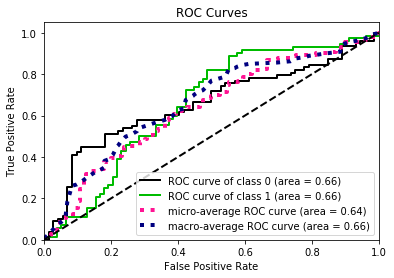

In [57]:
import scikitplot as skplt
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb = nb.fit(X_train, y_train)
y_probas = nb.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)
plt.show()

In [56]:
!pip install mglearn

  Created wheel for mglearn: filename=mglearn-0.1.7-py2.py3-none-any.whl size=582711 sha256=011c939ac643caa498f9fef507b4e5027a2936339c05181cc2f478435bf504c0
  Stored in directory: c:\users\tj\appdata\local\pip\cache\wheels\58\01\29\2ff749b641757ff133833c59a56c88ef6a5f966050db2d31fe
Successfully built mglearn


In [59]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)

In [60]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)

In [61]:
from sklearn.metrics import accuracy_score
print("Dummy model:")
print(accuracy_score(y_test, pred_dummy))
print("Decision tree:")
print(accuracy_score(y_test, pred_tree))

Dummy model:
0.52
Decision tree:
0.7866666666666666


In [62]:
from sklearn.metrics import confusion_matrix
print("Dummy model:")
print(confusion_matrix(y_test, pred_dummy))
print("Decision tree:")
print(confusion_matrix(y_test, pred_tree))

Dummy model:
[[78  0]
 [72  0]]
Decision tree:
[[74  4]
 [28 44]]


In [63]:
from sklearn.metrics import classification_report
print("Dummy model:")
print(classification_report(y_test, pred_dummy, 
                            target_names=["not 9", "9"]))
print("\nDecision tree:")
print(classification_report(y_test, pred_tree, 
                            target_names=["not 9", "9"]))

Dummy model:
              precision    recall  f1-score   support

       not 9       0.52      1.00      0.68        78
           9       0.00      0.00      0.00        72

    accuracy                           0.52       150
   macro avg       0.26      0.50      0.34       150
weighted avg       0.27      0.52      0.36       150


Decision tree:
              precision    recall  f1-score   support

       not 9       0.73      0.95      0.82        78
           9       0.92      0.61      0.73        72

    accuracy                           0.79       150
   macro avg       0.82      0.78      0.78       150
weighted avg       0.82      0.79      0.78       150



C:\Users\TJ\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
